In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
# import gossipcat as gc
import Baseline as bs

In [11]:
# load dataset
wd = '/Users/ewenwang/Documents/practice_data/'
file = 'loan_stats.csv'
df = pd.read_csv(wd+file)

In [14]:
df.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,issue_d,pymnt_plan,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Business,Car financing,Credit card refinancing,Debt consolidation,Green loan,Home buying,Home improvement,Major purchase,Medical expenses,Moving and relocation,Other,Vacation,DIRECT_PAY,INDIVIDUAL,JOINT,loan_status
0,15000,0,13.99,512.60,3,2,55000.0,2,0,372,23.78,1,20081,0,7.0,NaN,22,0,21345,0.58,43,0,0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2600,0,8.99,82.67,2,3,35000.0,2,0,970,6.73,0,24838,0,NaN,NaN,14,0,720,0.01,24,1,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,32200,1,21.49,880.02,0,10,65000.0,2,0,923,11.71,0,18630,1,NaN,87.0,17,1,11987,0.48,34,1,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,0,11.49,329.72,1,10,55900.0,2,0,780,26.21,0,16800,2,NaN,NaN,15,0,17209,0.53,62,1,0,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,6000,0,13.49,203.59,0,5,33000.0,2,0,232,19.05,0,20087,0,NaN,NaN,3,0,4576,0.95,11,0,0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
pd.unique(df.loan_status)

array([0, 1])

In [16]:
dtrain, dtest = train_test_split(df, test_size=0.2, random_state=2018)

target = 'loan_status'
predictors = [x for x in df.columns if x not in [target]]

In [17]:
base = bs.Baseline(dtrain, dtest, target, predictors)


predicting...

done.

Model Report
Accuracy : 0.971484
AUC Score (train): 0.500000
AUC Score (test): 0.500000
             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     18515
        1.0       0.00      0.00      0.00       527

avg / total       0.95      0.97      0.96     19042


Model Report
Recall metric in the testing dataset:  0.0


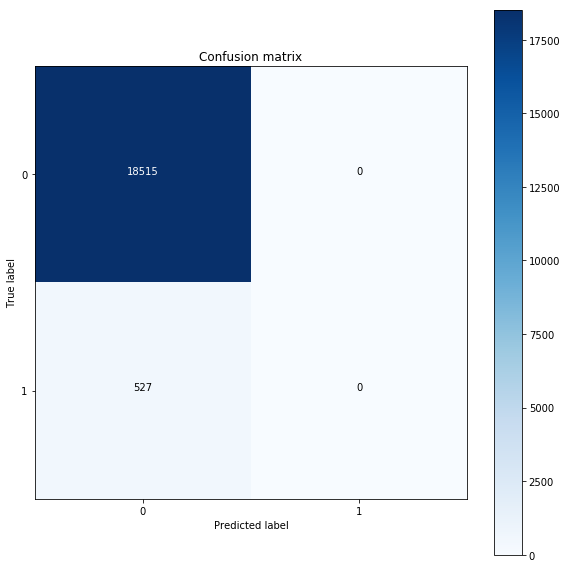

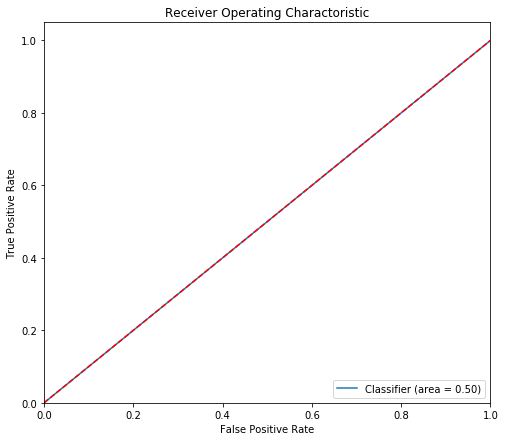


Model Report
Average Precision: 0.0277


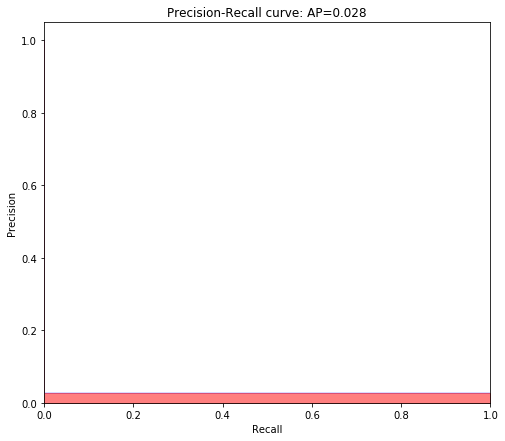

CPU times: user 38.4 s, sys: 951 ms, total: 39.4 s
Wall time: 41.1 s


In [18]:
%%time

lr = base.LR(report=True)

In [6]:
# %%time

# rf = base.RF(report=True)


predicting...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



done.

Model Report
Accuracy : 0.972112
AUC Score (train): 0.513462
AUC Score (test): 0.511945
             precision    recall  f1-score   support

          0       0.97      1.00      0.99     30826
          1       1.00      0.02      0.05       879

avg / total       0.97      0.97      0.96     31705


Model Report
Recall metric in the testing dataset:  0.023890784982935155


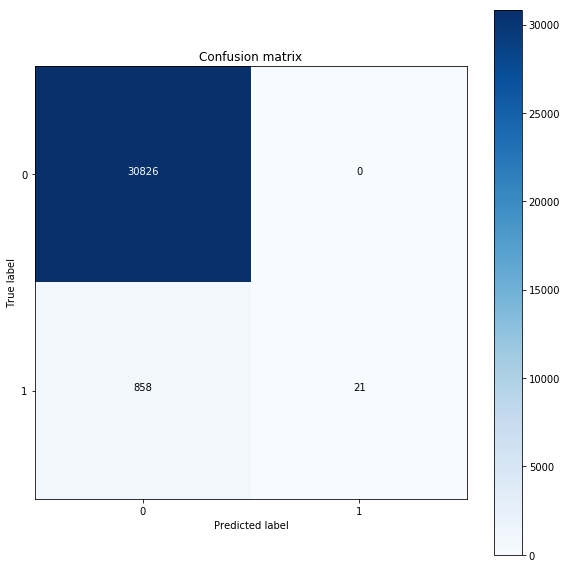

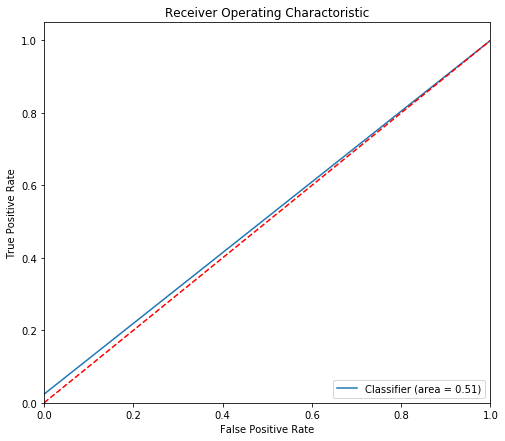


Model Report
Average Precision: 0.0510


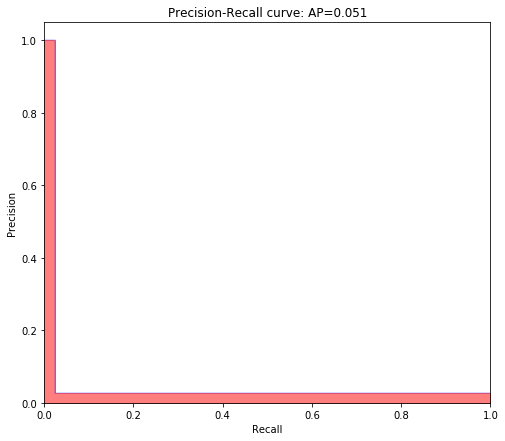

CPU times: user 22min 45s, sys: 13.5 s, total: 22min 58s
Wall time: 7min 36s


In [7]:
%%time

gb = base.GBDT(report=True)

Using TensorFlow backend.


Epoch 1/5
63505/63505 [==============================] - 18s 289us/step - loss: nan - acc: 0.0000e+00
Epoch 2/5
63505/63505 [==============================] - 21s 336us/step - loss: nan - acc: 0.0000e+00
Epoch 3/5
63505/63505 [==============================] - 20s 317us/step - loss: nan - acc: 0.0000e+00
Epoch 4/5
63505/63505 [==============================] - 20s 321us/step - loss: nan - acc: 0.0000e+00
Epoch 5/5
63505/63505 [==============================] - 19s 299us/step - loss: nan - acc: 0.0000e+00

predicting...
31705/31705 [==============================] - 3s 91us/step

done.

Model Report
Accuracy : 0.971341
AUC Score (train): 0.500000
AUC Score (test): 0.500000
             precision    recall  f1-score   support

          0       0.97      1.00      0.99     30826
          1       0.00      0.00      0.00       879

avg / total       0.95      0.97      0.96     31705


Model Report
Recall metric in the testing dataset:  0.0


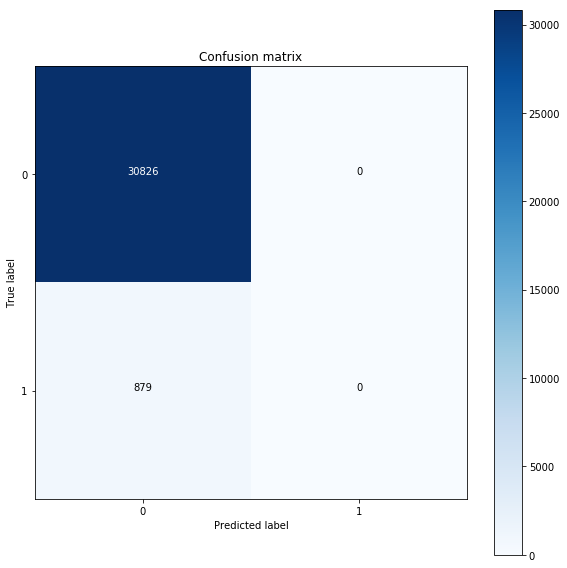

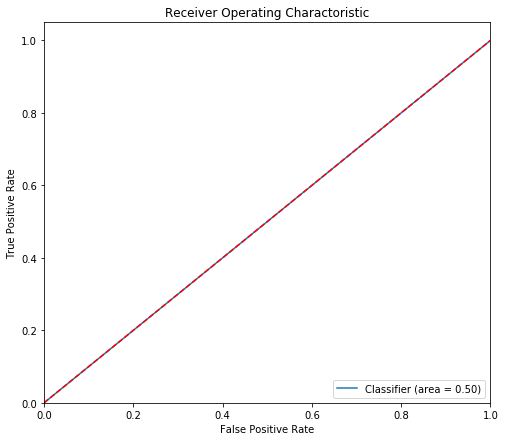


Model Report
Average Precision: 0.0277


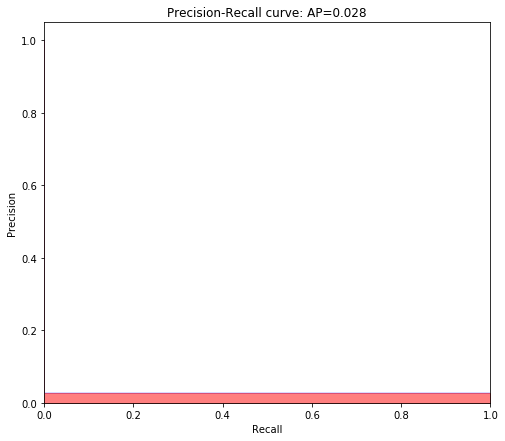

CPU times: user 2min 16s, sys: 35.1 s, total: 2min 52s
Wall time: 2min


In [10]:
%%time

dp = base.NN(report=True)